# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 47kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

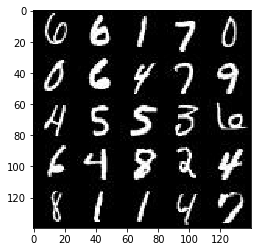

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

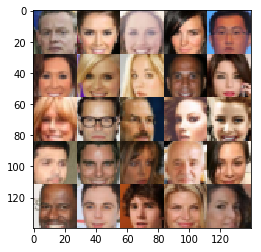

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, param_z):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, shape=(None, param_z), name='input_z')
    learning_rate = tf.placeholder(tf.float32, shape=(), name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input is 28x28x3
        x = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = tf.maximum(x * alpha, x)
        # 14x14x64
        
        x = tf.layers.conv2d(x, 128, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = tf.maximum(x * alpha, x)
        x = tf.layers.batch_normalization(x, training=True)
        # 7x7x128
        
        x = tf.layers.conv2d(x, 256, 5, strides=2, kernel_initializer=kinit, padding='same')
        x = tf.maximum(x * alpha, x)
        x = tf.layers.batch_normalization(x, training=True)
        # 4x4x256
        
        x = tf.reshape(x, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)

        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.5)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.5)

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
       
        out = tf.tanh(logits) 
   
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                
                # Normalize input to be between -1 and 1 to match generator's images
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.8124... Generator Loss: 29.9494
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 22.8249
Epoch 1/2... Discriminator Loss: 0.3929... Generator Loss: 15.4401
Epoch 1/2... Discriminator Loss: 1.2069... Generator Loss: 1.7653
Epoch 1/2... Discriminator Loss: 0.5215... Generator Loss: 2.9401
Epoch 1/2... Discriminator Loss: 0.6037... Generator Loss: 2.5395
Epoch 1/2... Discriminator Loss: 2.0697... Generator Loss: 6.2968
Epoch 1/2... Discriminator Loss: 0.5003... Generator Loss: 3.5022
Epoch 1/2... Discriminator Loss: 3.6405... Generator Loss: 0.1064
Epoch 1/2... Discriminator Loss: 1.2732... Generator Loss: 0.8249


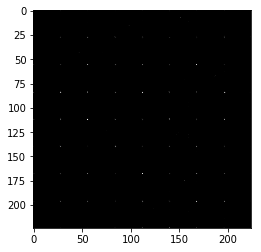

Epoch 1/2... Discriminator Loss: 1.3206... Generator Loss: 0.8837
Epoch 1/2... Discriminator Loss: 0.9921... Generator Loss: 1.0325
Epoch 1/2... Discriminator Loss: 0.8121... Generator Loss: 1.7846
Epoch 1/2... Discriminator Loss: 0.7399... Generator Loss: 2.0391
Epoch 1/2... Discriminator Loss: 0.8391... Generator Loss: 1.2430
Epoch 1/2... Discriminator Loss: 0.6982... Generator Loss: 2.1812
Epoch 1/2... Discriminator Loss: 0.8325... Generator Loss: 1.4479
Epoch 1/2... Discriminator Loss: 1.2365... Generator Loss: 0.6840
Epoch 1/2... Discriminator Loss: 0.9682... Generator Loss: 0.9719
Epoch 1/2... Discriminator Loss: 0.8150... Generator Loss: 1.4770


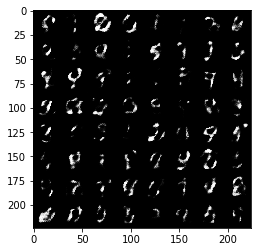

Epoch 1/2... Discriminator Loss: 1.1728... Generator Loss: 0.8263
Epoch 1/2... Discriminator Loss: 0.8282... Generator Loss: 1.9681
Epoch 1/2... Discriminator Loss: 0.7959... Generator Loss: 1.8708
Epoch 1/2... Discriminator Loss: 0.8394... Generator Loss: 1.4965
Epoch 1/2... Discriminator Loss: 1.5387... Generator Loss: 0.5102
Epoch 1/2... Discriminator Loss: 1.2731... Generator Loss: 0.6677
Epoch 1/2... Discriminator Loss: 1.4114... Generator Loss: 0.5917
Epoch 1/2... Discriminator Loss: 1.2846... Generator Loss: 2.6346
Epoch 1/2... Discriminator Loss: 1.5070... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 1.7912


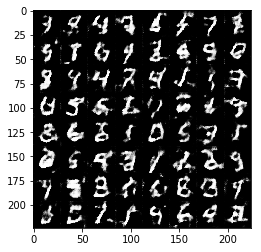

Epoch 1/2... Discriminator Loss: 0.8308... Generator Loss: 1.4859
Epoch 1/2... Discriminator Loss: 1.1647... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.1589... Generator Loss: 0.7677
Epoch 1/2... Discriminator Loss: 1.4469... Generator Loss: 0.5313
Epoch 1/2... Discriminator Loss: 0.9224... Generator Loss: 1.9499
Epoch 1/2... Discriminator Loss: 0.9248... Generator Loss: 1.0840
Epoch 1/2... Discriminator Loss: 0.9416... Generator Loss: 1.1427
Epoch 1/2... Discriminator Loss: 1.1184... Generator Loss: 0.8981
Epoch 1/2... Discriminator Loss: 1.0202... Generator Loss: 1.0251
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.3372


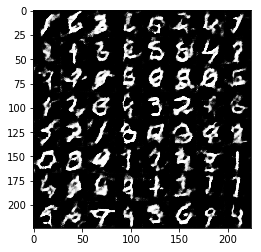

Epoch 1/2... Discriminator Loss: 1.1463... Generator Loss: 0.9914
Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 2.8281
Epoch 1/2... Discriminator Loss: 0.8272... Generator Loss: 1.1318
Epoch 1/2... Discriminator Loss: 0.8201... Generator Loss: 1.3202
Epoch 1/2... Discriminator Loss: 0.7239... Generator Loss: 1.9009
Epoch 1/2... Discriminator Loss: 1.8063... Generator Loss: 0.4209
Epoch 1/2... Discriminator Loss: 0.8481... Generator Loss: 1.1580
Epoch 1/2... Discriminator Loss: 1.6645... Generator Loss: 0.6270
Epoch 1/2... Discriminator Loss: 0.7105... Generator Loss: 2.1979
Epoch 1/2... Discriminator Loss: 0.7825... Generator Loss: 1.7537


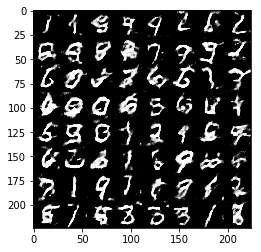

Epoch 1/2... Discriminator Loss: 0.7836... Generator Loss: 1.2945
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 1.9887
Epoch 1/2... Discriminator Loss: 1.2286... Generator Loss: 3.1327
Epoch 1/2... Discriminator Loss: 0.7609... Generator Loss: 1.6374
Epoch 1/2... Discriminator Loss: 0.6464... Generator Loss: 2.6539
Epoch 1/2... Discriminator Loss: 0.7110... Generator Loss: 1.7240
Epoch 1/2... Discriminator Loss: 0.6187... Generator Loss: 2.1509
Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 1.5085
Epoch 1/2... Discriminator Loss: 0.7755... Generator Loss: 1.3653
Epoch 1/2... Discriminator Loss: 0.7535... Generator Loss: 2.4174


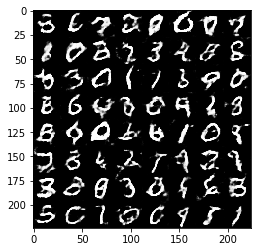

Epoch 1/2... Discriminator Loss: 0.8240... Generator Loss: 1.4453
Epoch 1/2... Discriminator Loss: 0.6726... Generator Loss: 1.4627
Epoch 1/2... Discriminator Loss: 0.9458... Generator Loss: 0.7758
Epoch 1/2... Discriminator Loss: 0.6505... Generator Loss: 2.7745
Epoch 1/2... Discriminator Loss: 0.6419... Generator Loss: 3.4565
Epoch 1/2... Discriminator Loss: 0.6967... Generator Loss: 1.4788
Epoch 1/2... Discriminator Loss: 0.4938... Generator Loss: 2.0552
Epoch 1/2... Discriminator Loss: 0.5096... Generator Loss: 2.2445
Epoch 1/2... Discriminator Loss: 1.5353... Generator Loss: 0.5528
Epoch 1/2... Discriminator Loss: 0.5438... Generator Loss: 1.8706


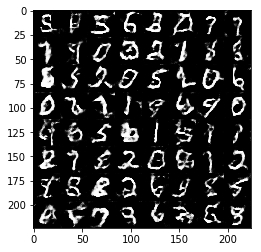

Epoch 1/2... Discriminator Loss: 0.6148... Generator Loss: 1.7483
Epoch 1/2... Discriminator Loss: 0.4606... Generator Loss: 2.6300
Epoch 1/2... Discriminator Loss: 1.1061... Generator Loss: 3.3252
Epoch 1/2... Discriminator Loss: 0.5303... Generator Loss: 2.1913
Epoch 1/2... Discriminator Loss: 0.5223... Generator Loss: 2.0775
Epoch 1/2... Discriminator Loss: 0.4482... Generator Loss: 2.8297
Epoch 1/2... Discriminator Loss: 0.5776... Generator Loss: 3.3524
Epoch 1/2... Discriminator Loss: 0.4812... Generator Loss: 2.3799
Epoch 1/2... Discriminator Loss: 0.4718... Generator Loss: 2.7564
Epoch 1/2... Discriminator Loss: 0.5684... Generator Loss: 2.0366


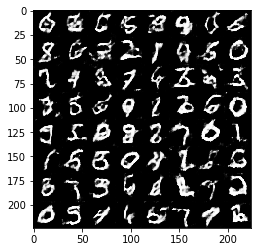

Epoch 1/2... Discriminator Loss: 1.4300... Generator Loss: 0.5893
Epoch 1/2... Discriminator Loss: 1.0698... Generator Loss: 1.2183
Epoch 1/2... Discriminator Loss: 0.5678... Generator Loss: 2.1010
Epoch 1/2... Discriminator Loss: 1.5558... Generator Loss: 4.4769
Epoch 1/2... Discriminator Loss: 0.5930... Generator Loss: 1.6630
Epoch 1/2... Discriminator Loss: 0.4354... Generator Loss: 2.6206
Epoch 1/2... Discriminator Loss: 0.4363... Generator Loss: 3.1728
Epoch 1/2... Discriminator Loss: 0.4332... Generator Loss: 2.4280
Epoch 1/2... Discriminator Loss: 0.5210... Generator Loss: 2.4586
Epoch 1/2... Discriminator Loss: 0.4646... Generator Loss: 3.7712


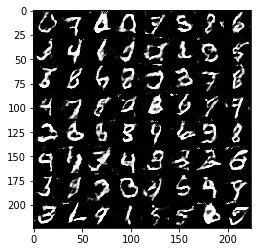

Epoch 1/2... Discriminator Loss: 0.9480... Generator Loss: 0.9164
Epoch 1/2... Discriminator Loss: 0.4098... Generator Loss: 2.8417
Epoch 1/2... Discriminator Loss: 1.7456... Generator Loss: 0.5145
Epoch 2/2... Discriminator Loss: 0.8105... Generator Loss: 3.5595
Epoch 2/2... Discriminator Loss: 0.6080... Generator Loss: 2.1540
Epoch 2/2... Discriminator Loss: 0.7430... Generator Loss: 4.9096
Epoch 2/2... Discriminator Loss: 0.6418... Generator Loss: 4.1395
Epoch 2/2... Discriminator Loss: 0.5263... Generator Loss: 2.0522
Epoch 2/2... Discriminator Loss: 0.5473... Generator Loss: 3.6199
Epoch 2/2... Discriminator Loss: 0.4076... Generator Loss: 3.2972


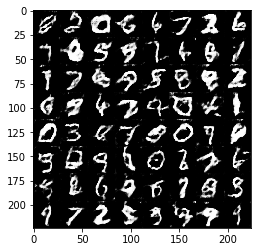

Epoch 2/2... Discriminator Loss: 0.4751... Generator Loss: 2.4108
Epoch 2/2... Discriminator Loss: 0.7567... Generator Loss: 1.7037
Epoch 2/2... Discriminator Loss: 1.2110... Generator Loss: 0.7861
Epoch 2/2... Discriminator Loss: 2.0639... Generator Loss: 6.0228
Epoch 2/2... Discriminator Loss: 0.5749... Generator Loss: 1.9315
Epoch 2/2... Discriminator Loss: 0.4118... Generator Loss: 3.4131
Epoch 2/2... Discriminator Loss: 0.7825... Generator Loss: 1.0045
Epoch 2/2... Discriminator Loss: 0.4183... Generator Loss: 2.9305
Epoch 2/2... Discriminator Loss: 0.3564... Generator Loss: 4.3224
Epoch 2/2... Discriminator Loss: 1.3975... Generator Loss: 0.8331


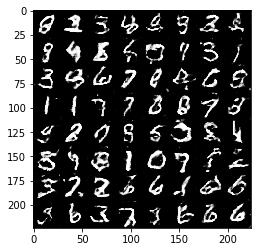

Epoch 2/2... Discriminator Loss: 0.3739... Generator Loss: 3.8875
Epoch 2/2... Discriminator Loss: 0.3882... Generator Loss: 3.1775
Epoch 2/2... Discriminator Loss: 0.7109... Generator Loss: 4.9448
Epoch 2/2... Discriminator Loss: 0.9133... Generator Loss: 3.2233
Epoch 2/2... Discriminator Loss: 0.4488... Generator Loss: 2.5535
Epoch 2/2... Discriminator Loss: 0.3806... Generator Loss: 3.4262
Epoch 2/2... Discriminator Loss: 0.5417... Generator Loss: 2.1506
Epoch 2/2... Discriminator Loss: 0.5232... Generator Loss: 3.0263
Epoch 2/2... Discriminator Loss: 0.3943... Generator Loss: 3.0840
Epoch 2/2... Discriminator Loss: 0.7014... Generator Loss: 1.7307


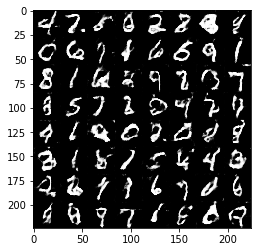

Epoch 2/2... Discriminator Loss: 0.4093... Generator Loss: 2.9821
Epoch 2/2... Discriminator Loss: 0.4659... Generator Loss: 2.4862
Epoch 2/2... Discriminator Loss: 0.4292... Generator Loss: 4.2462
Epoch 2/2... Discriminator Loss: 0.3720... Generator Loss: 4.4130
Epoch 2/2... Discriminator Loss: 0.6625... Generator Loss: 1.5095
Epoch 2/2... Discriminator Loss: 0.6720... Generator Loss: 1.9051
Epoch 2/2... Discriminator Loss: 0.5909... Generator Loss: 2.0084
Epoch 2/2... Discriminator Loss: 0.6084... Generator Loss: 2.1140
Epoch 2/2... Discriminator Loss: 0.4519... Generator Loss: 2.2625
Epoch 2/2... Discriminator Loss: 0.3733... Generator Loss: 3.5530


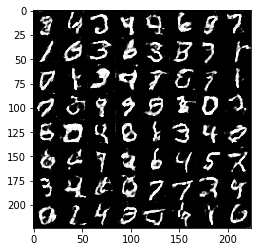

Epoch 2/2... Discriminator Loss: 0.4938... Generator Loss: 1.8986
Epoch 2/2... Discriminator Loss: 0.4485... Generator Loss: 2.4264
Epoch 2/2... Discriminator Loss: 0.3655... Generator Loss: 3.5400
Epoch 2/2... Discriminator Loss: 0.6641... Generator Loss: 1.7338
Epoch 2/2... Discriminator Loss: 0.3473... Generator Loss: 4.5867
Epoch 2/2... Discriminator Loss: 0.3859... Generator Loss: 4.1494
Epoch 2/2... Discriminator Loss: 0.7964... Generator Loss: 1.8282
Epoch 2/2... Discriminator Loss: 0.7184... Generator Loss: 1.9161
Epoch 2/2... Discriminator Loss: 0.4091... Generator Loss: 2.4122
Epoch 2/2... Discriminator Loss: 1.8847... Generator Loss: 0.4020


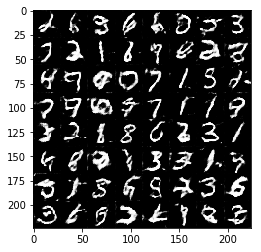

Epoch 2/2... Discriminator Loss: 0.5339... Generator Loss: 1.8228
Epoch 2/2... Discriminator Loss: 0.4794... Generator Loss: 2.8029
Epoch 2/2... Discriminator Loss: 0.3488... Generator Loss: 4.6591
Epoch 2/2... Discriminator Loss: 0.4024... Generator Loss: 3.4603
Epoch 2/2... Discriminator Loss: 0.3642... Generator Loss: 3.1584
Epoch 2/2... Discriminator Loss: 0.4050... Generator Loss: 3.4462
Epoch 2/2... Discriminator Loss: 0.3889... Generator Loss: 2.9175
Epoch 2/2... Discriminator Loss: 0.3966... Generator Loss: 3.1432
Epoch 2/2... Discriminator Loss: 0.3890... Generator Loss: 3.2851
Epoch 2/2... Discriminator Loss: 0.3566... Generator Loss: 4.1377


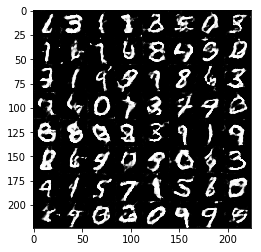

Epoch 2/2... Discriminator Loss: 0.4732... Generator Loss: 2.6112
Epoch 2/2... Discriminator Loss: 0.4762... Generator Loss: 2.4707
Epoch 2/2... Discriminator Loss: 0.5493... Generator Loss: 2.6277
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 2.2428
Epoch 2/2... Discriminator Loss: 0.4006... Generator Loss: 3.3460
Epoch 2/2... Discriminator Loss: 0.5190... Generator Loss: 2.7918
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.7474
Epoch 2/2... Discriminator Loss: 0.3978... Generator Loss: 3.6380
Epoch 2/2... Discriminator Loss: 0.4526... Generator Loss: 3.5200
Epoch 2/2... Discriminator Loss: 0.5007... Generator Loss: 1.9606


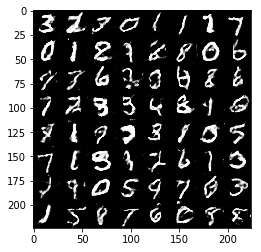

Epoch 2/2... Discriminator Loss: 0.5610... Generator Loss: 4.3839
Epoch 2/2... Discriminator Loss: 0.9950... Generator Loss: 0.9522
Epoch 2/2... Discriminator Loss: 0.6942... Generator Loss: 3.8823
Epoch 2/2... Discriminator Loss: 0.5985... Generator Loss: 2.2768
Epoch 2/2... Discriminator Loss: 0.5914... Generator Loss: 1.9463
Epoch 2/2... Discriminator Loss: 1.3119... Generator Loss: 0.7768
Epoch 2/2... Discriminator Loss: 0.3780... Generator Loss: 4.0803
Epoch 2/2... Discriminator Loss: 0.8293... Generator Loss: 1.3561
Epoch 2/2... Discriminator Loss: 0.3653... Generator Loss: 3.7479
Epoch 2/2... Discriminator Loss: 0.4018... Generator Loss: 2.8023


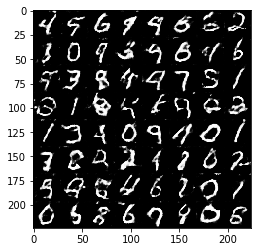

Epoch 2/2... Discriminator Loss: 0.4682... Generator Loss: 2.5947
Epoch 2/2... Discriminator Loss: 0.3885... Generator Loss: 4.0323
Epoch 2/2... Discriminator Loss: 0.4448... Generator Loss: 3.0423
Epoch 2/2... Discriminator Loss: 0.3887... Generator Loss: 4.3236
Epoch 2/2... Discriminator Loss: 0.4980... Generator Loss: 5.6807
Epoch 2/2... Discriminator Loss: 0.6290... Generator Loss: 2.2604
Epoch 2/2... Discriminator Loss: 0.4236... Generator Loss: 2.2298
Epoch 2/2... Discriminator Loss: 0.3643... Generator Loss: 4.1891
Epoch 2/2... Discriminator Loss: 0.5587... Generator Loss: 3.7037
Epoch 2/2... Discriminator Loss: 0.4305... Generator Loss: 4.2860


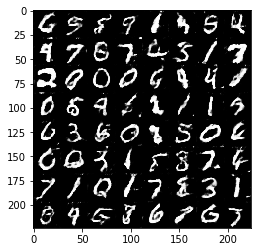

Epoch 2/2... Discriminator Loss: 0.3878... Generator Loss: 4.2885
Epoch 2/2... Discriminator Loss: 0.3593... Generator Loss: 4.2032
Epoch 2/2... Discriminator Loss: 0.3469... Generator Loss: 4.2384
Epoch 2/2... Discriminator Loss: 0.3776... Generator Loss: 5.2283
Epoch 2/2... Discriminator Loss: 0.3512... Generator Loss: 4.4149
Epoch 2/2... Discriminator Loss: 0.3699... Generator Loss: 3.5575
Epoch 2/2... Discriminator Loss: 0.7515... Generator Loss: 1.5625


In [20]:

batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 1.6234
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 6.9828
Epoch 1/1... Discriminator Loss: 0.6877... Generator Loss: 8.2986
Epoch 1/1... Discriminator Loss: 0.7214... Generator Loss: 1.7754
Epoch 1/1... Discriminator Loss: 0.9866... Generator Loss: 1.3060
Epoch 1/1... Discriminator Loss: 0.3956... Generator Loss: 4.7454
Epoch 1/1... Discriminator Loss: 0.4176... Generator Loss: 3.6736
Epoch 1/1... Discriminator Loss: 0.5366... Generator Loss: 2.5994
Epoch 1/1... Discriminator Loss: 0.5379... Generator Loss: 2.1068
Epoch 1/1... Discriminator Loss: 0.4491... Generator Loss: 3.2513


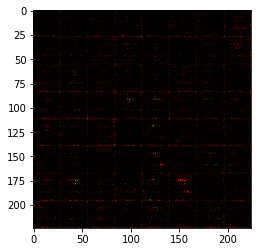

Epoch 1/1... Discriminator Loss: 0.3826... Generator Loss: 4.1818
Epoch 1/1... Discriminator Loss: 0.3676... Generator Loss: 3.9794
Epoch 1/1... Discriminator Loss: 0.3862... Generator Loss: 3.5737
Epoch 1/1... Discriminator Loss: 0.3482... Generator Loss: 5.7779
Epoch 1/1... Discriminator Loss: 2.3236... Generator Loss: 0.2312
Epoch 1/1... Discriminator Loss: 0.9360... Generator Loss: 1.7748
Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 1.3133
Epoch 1/1... Discriminator Loss: 0.6366... Generator Loss: 1.8849
Epoch 1/1... Discriminator Loss: 1.6571... Generator Loss: 1.2237
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 2.3269


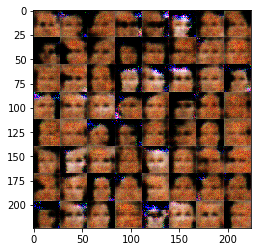

Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 3.2064... Generator Loss: 0.1218
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 1.1270
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 0.9221
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.9233
Epoch 1/1... Discriminator Loss: 1.0465... Generator Loss: 1.4882
Epoch 1/1... Discriminator Loss: 0.8617... Generator Loss: 1.8937
Epoch 1/1... Discriminator Loss: 1.2033... Generator Loss: 0.7353


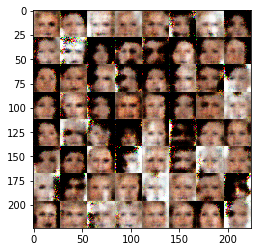

Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.5820
Epoch 1/1... Discriminator Loss: 5.9496... Generator Loss: 6.1942
Epoch 1/1... Discriminator Loss: 1.1608... Generator Loss: 1.2548
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 2.6458
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 1.2691
Epoch 1/1... Discriminator Loss: 0.8721... Generator Loss: 2.0153
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 1.0729
Epoch 1/1... Discriminator Loss: 0.9894... Generator Loss: 1.0826


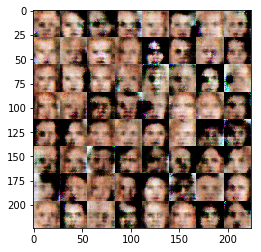

Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 1.2137
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 2.6049
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 1.2509
Epoch 1/1... Discriminator Loss: 1.5925... Generator Loss: 2.7549
Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 1.2192
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 1.8777
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 1.3325


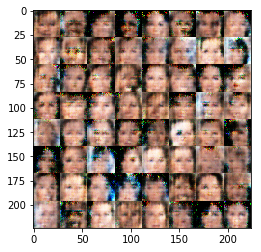

Epoch 1/1... Discriminator Loss: 0.9516... Generator Loss: 1.3949
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 0.9977
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 0.7613
Epoch 1/1... Discriminator Loss: 0.8642... Generator Loss: 1.8498
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 2.2065
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.3194
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 0.9976... Generator Loss: 1.1645
Epoch 1/1... Discriminator Loss: 1.0069... Generator Loss: 1.5206
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 1.1592


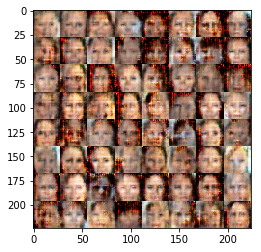

Epoch 1/1... Discriminator Loss: 1.6317... Generator Loss: 2.7409
Epoch 1/1... Discriminator Loss: 1.1593... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 1.6019
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 1.1179
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 2.3746
Epoch 1/1... Discriminator Loss: 1.1981... Generator Loss: 1.7080
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.8659
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.9254


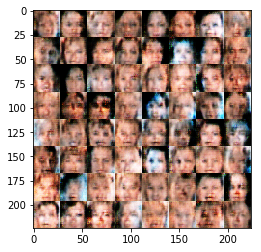

Epoch 1/1... Discriminator Loss: 1.2632... Generator Loss: 1.1987
Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 1.5300
Epoch 1/1... Discriminator Loss: 0.9340... Generator Loss: 1.2613
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.8965
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.0924... Generator Loss: 1.8231
Epoch 1/1... Discriminator Loss: 1.0592... Generator Loss: 1.3193
Epoch 1/1... Discriminator Loss: 1.0870... Generator Loss: 0.9742
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 1.0971


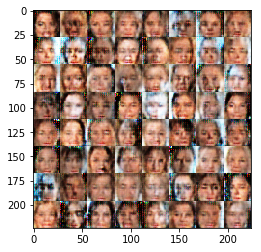

Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 1.1724
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 0.8721... Generator Loss: 1.6723
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.2378... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 2.1498... Generator Loss: 3.6146
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.9553
Epoch 1/1... Discriminator Loss: 0.8861... Generator Loss: 1.1909


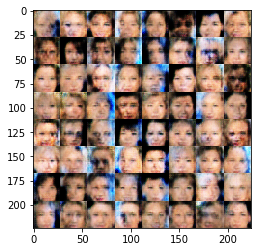

Epoch 1/1... Discriminator Loss: 1.6418... Generator Loss: 2.9133
Epoch 1/1... Discriminator Loss: 1.6175... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 1.0327
Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 1.3914
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 1.3066
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 1.0209


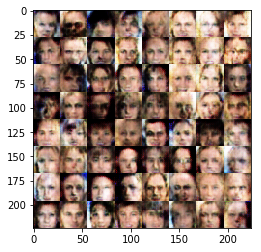

Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 1.4900
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.2049... Generator Loss: 1.4446
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.9165
Epoch 1/1... Discriminator Loss: 1.3410... Generator Loss: 0.8747
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 1.1202
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 1.1960


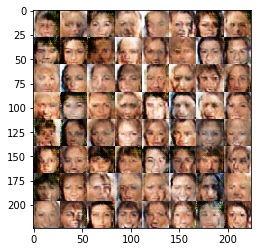

Epoch 1/1... Discriminator Loss: 1.2475... Generator Loss: 1.4213
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.9175
Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.6806
Epoch 1/1... Discriminator Loss: 1.1354... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 1.2695
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 1.0956


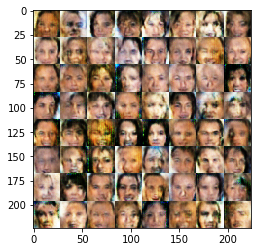

Epoch 1/1... Discriminator Loss: 2.3473... Generator Loss: 0.2154
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.1505... Generator Loss: 1.0536
Epoch 1/1... Discriminator Loss: 1.0577... Generator Loss: 1.0207
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.9998
Epoch 1/1... Discriminator Loss: 1.2169... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 1.5222
Epoch 1/1... Discriminator Loss: 1.6180... Generator Loss: 0.3793
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7002


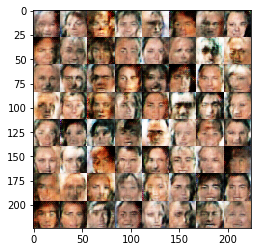

Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.6058
Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.9443
Epoch 1/1... Discriminator Loss: 1.0789... Generator Loss: 1.3209
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.5349... Generator Loss: 0.4567
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 1.3867
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.9595


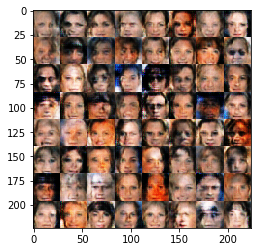

Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 1.2662
Epoch 1/1... Discriminator Loss: 0.9802... Generator Loss: 1.0723
Epoch 1/1... Discriminator Loss: 0.9912... Generator Loss: 1.2782
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 1.1280
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.0683
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 1.1078
Epoch 1/1... Discriminator Loss: 1.0826... Generator Loss: 0.9205
Epoch 1/1... Discriminator Loss: 1.0948... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.2062... Generator Loss: 0.9243
Epoch 1/1... Discriminator Loss: 1.8961... Generator Loss: 2.7571


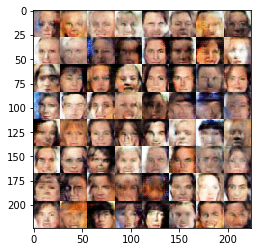

Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.9542
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 1.3078
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 1.3857
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 1.6189
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 1.1257
Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 1.2411
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 2.0466
Epoch 1/1... Discriminator Loss: 1.0311... Generator Loss: 1.3143


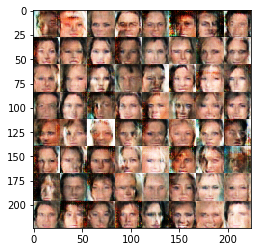

Epoch 1/1... Discriminator Loss: 1.0058... Generator Loss: 1.1476
Epoch 1/1... Discriminator Loss: 0.8745... Generator Loss: 1.1091
Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.5139
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 1.4148
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 1.2586
Epoch 1/1... Discriminator Loss: 0.9410... Generator Loss: 1.2263
Epoch 1/1... Discriminator Loss: 0.8961... Generator Loss: 1.5476
Epoch 1/1... Discriminator Loss: 1.0118... Generator Loss: 1.5123
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.6382


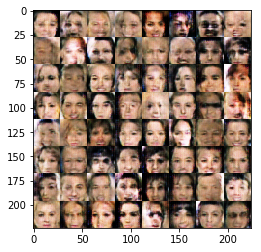

Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 1.1687
Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.1090... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 1.1398
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 1.9224
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.9829
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.9116
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 1.3229


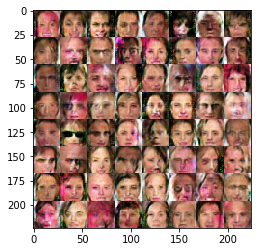

Epoch 1/1... Discriminator Loss: 0.9074... Generator Loss: 1.2592
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 2.1414
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 1.0856
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 1.1774
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 0.8719
Epoch 1/1... Discriminator Loss: 0.9788... Generator Loss: 1.1485


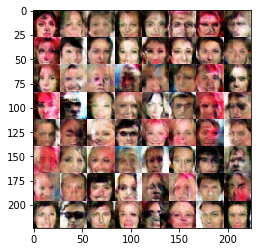

Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 0.9772
Epoch 1/1... Discriminator Loss: 1.5144... Generator Loss: 0.4827
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 1.0010
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 1.1848
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 0.9454... Generator Loss: 1.0231


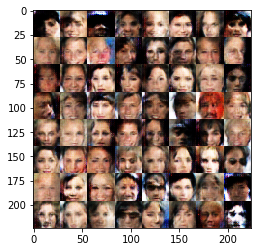

Epoch 1/1... Discriminator Loss: 1.0431... Generator Loss: 1.8392
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.2804
Epoch 1/1... Discriminator Loss: 0.7863... Generator Loss: 1.7268
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 0.8827... Generator Loss: 1.3270
Epoch 1/1... Discriminator Loss: 0.8056... Generator Loss: 1.1332
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 3.3174
Epoch 1/1... Discriminator Loss: 1.6286... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.2043
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.1533


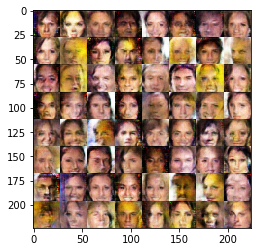

Epoch 1/1... Discriminator Loss: 0.9257... Generator Loss: 1.3362
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.9304
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.8262
Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.1386
Epoch 1/1... Discriminator Loss: 1.2180... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 1.1287
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 2.9113
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 1.4543
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.6796


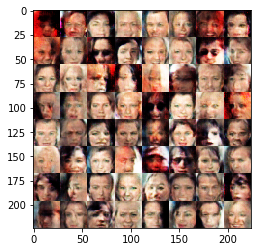

Epoch 1/1... Discriminator Loss: 0.8721... Generator Loss: 1.4161
Epoch 1/1... Discriminator Loss: 1.0811... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 1.6059
Epoch 1/1... Discriminator Loss: 1.8795... Generator Loss: 0.4315
Epoch 1/1... Discriminator Loss: 1.1584... Generator Loss: 0.8365
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 2.7207
Epoch 1/1... Discriminator Loss: 0.5855... Generator Loss: 2.3380
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 1.0324
Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.1256
Epoch 1/1... Discriminator Loss: 0.7199... Generator Loss: 1.7530


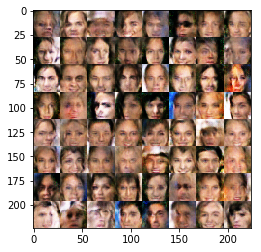

Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 1.0349
Epoch 1/1... Discriminator Loss: 0.9161... Generator Loss: 1.9411
Epoch 1/1... Discriminator Loss: 0.6872... Generator Loss: 1.3336
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 0.9636... Generator Loss: 1.0738
Epoch 1/1... Discriminator Loss: 0.7272... Generator Loss: 2.1714
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.0620
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 1.5027
Epoch 1/1... Discriminator Loss: 0.9944... Generator Loss: 0.9871


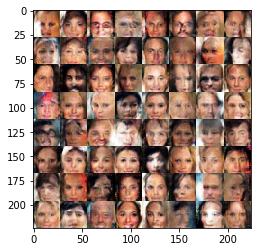

Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 0.9879
Epoch 1/1... Discriminator Loss: 0.8590... Generator Loss: 2.2410
Epoch 1/1... Discriminator Loss: 1.1695... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 0.8835... Generator Loss: 1.5476
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.1763
Epoch 1/1... Discriminator Loss: 1.2635... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 0.7274... Generator Loss: 1.5173
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 3.5083
Epoch 1/1... Discriminator Loss: 0.9237... Generator Loss: 1.1951
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 0.7379


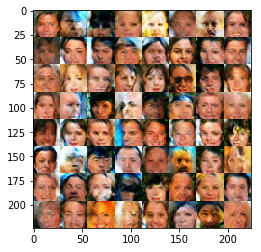

Epoch 1/1... Discriminator Loss: 0.6150... Generator Loss: 2.0368
Epoch 1/1... Discriminator Loss: 0.6132... Generator Loss: 2.5408
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 0.9425
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 1.2832
Epoch 1/1... Discriminator Loss: 0.8498... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 0.8000... Generator Loss: 2.2178
Epoch 1/1... Discriminator Loss: 0.6773... Generator Loss: 2.0768
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 0.8791
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 1.0526


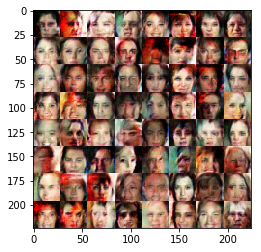

Epoch 1/1... Discriminator Loss: 0.8381... Generator Loss: 1.0888
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.1234
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 1.8481
Epoch 1/1... Discriminator Loss: 0.6177... Generator Loss: 1.7780
Epoch 1/1... Discriminator Loss: 0.6301... Generator Loss: 2.4544
Epoch 1/1... Discriminator Loss: 0.5492... Generator Loss: 2.7980
Epoch 1/1... Discriminator Loss: 0.6286... Generator Loss: 3.0117
Epoch 1/1... Discriminator Loss: 2.2212... Generator Loss: 0.3400
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 1.3296
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.8564


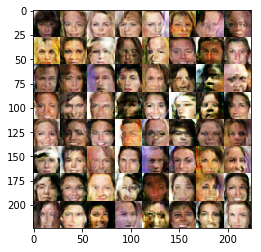

Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 1.9127
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 2.5103
Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 1.3251
Epoch 1/1... Discriminator Loss: 0.7940... Generator Loss: 1.4989
Epoch 1/1... Discriminator Loss: 1.7215... Generator Loss: 0.5009
Epoch 1/1... Discriminator Loss: 0.7545... Generator Loss: 2.1782
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 1.1865
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 1.6112


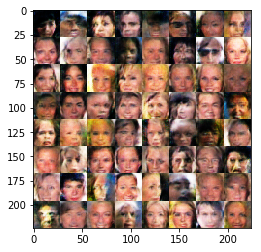

Epoch 1/1... Discriminator Loss: 0.6244... Generator Loss: 1.9127
Epoch 1/1... Discriminator Loss: 0.9027... Generator Loss: 1.1187
Epoch 1/1... Discriminator Loss: 0.7139... Generator Loss: 2.7024
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 1.9977
Epoch 1/1... Discriminator Loss: 0.5219... Generator Loss: 1.9863
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 4.4607
Epoch 1/1... Discriminator Loss: 0.8009... Generator Loss: 2.5074
Epoch 1/1... Discriminator Loss: 1.0317... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 1.7081
Epoch 1/1... Discriminator Loss: 0.6689... Generator Loss: 1.7291


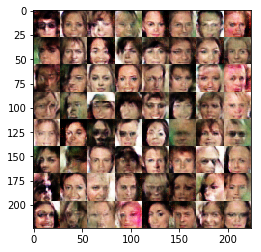

Epoch 1/1... Discriminator Loss: 0.5944... Generator Loss: 2.0794
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 2.7137
Epoch 1/1... Discriminator Loss: 0.7393... Generator Loss: 1.4494
Epoch 1/1... Discriminator Loss: 0.7330... Generator Loss: 1.7470
Epoch 1/1... Discriminator Loss: 0.5110... Generator Loss: 2.3238
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 2.4175
Epoch 1/1... Discriminator Loss: 0.5723... Generator Loss: 2.1332
Epoch 1/1... Discriminator Loss: 0.7484... Generator Loss: 2.0660
Epoch 1/1... Discriminator Loss: 0.9033... Generator Loss: 1.1446
Epoch 1/1... Discriminator Loss: 0.7890... Generator Loss: 1.5133


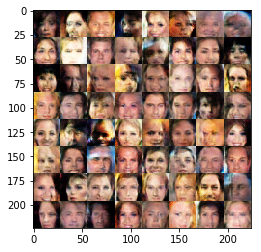

Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.5133
Epoch 1/1... Discriminator Loss: 0.7695... Generator Loss: 1.6102
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.9521
Epoch 1/1... Discriminator Loss: 1.6404... Generator Loss: 0.4649
Epoch 1/1... Discriminator Loss: 0.6356... Generator Loss: 1.4309
Epoch 1/1... Discriminator Loss: 0.5330... Generator Loss: 1.9286
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 3.1861
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.0003
Epoch 1/1... Discriminator Loss: 0.8865... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 0.5502... Generator Loss: 2.8620


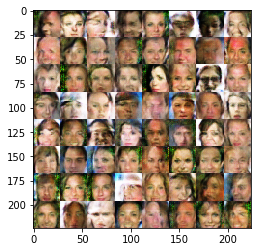

Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 3.3387
Epoch 1/1... Discriminator Loss: 0.7309... Generator Loss: 1.3079
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.2230
Epoch 1/1... Discriminator Loss: 0.6192... Generator Loss: 1.9762
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 1.0316... Generator Loss: 0.7750


In [21]:

batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.